In [1]:
# Importing the relevant libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV File 

data=pd.read_excel('Task Data .xlsx')

In [3]:
data.head()

,Ticket ID,Created Date,Created Time,Assigned To,First Response Time,Resolved Date,Resolved Time,Source,Department,Issue Category
0,7339585423,01/04/2024,00:00:17,Agent 39,13:48:07,01/04/2024,13:49:33,Call,Others,NaN
1,7339585424,01/04/2024,00:01:30,Agent 39,13:50:51,01/04/2024,13:52:19,Call,Others,NaN
2,7339585425,01/04/2024,00:04:19,Agent 39,13:53:11,01/04/2024,13:53:48,Call,Others,NaN
3,7339585426,01/04/2024,00:05:18,Agent 39,NaN,01/04/2024,13:55:49,General,Others,NaN
4,7339585427,01/04/2024,00:06:17,Agent 39,13:56:34,01/04/2024,13:58:26,Call,Others,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12816 entries, 0 to 12815
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ticket ID            12816 non-null  int64 
 1   Created Date         12816 non-null  object
 2   Created Time         12816 non-null  object
 3   Assigned To          12691 non-null  object
 4   First Response Time  11504 non-null  object
 5   Resolved Date        12010 non-null  object
 6   Resolved Time        12010 non-null  object
 7   Source               12816 non-null  object
 8   Department           11846 non-null  object
 9   Issue Category       11826 non-null  object
dtypes: int64(1), object(9)
memory usage: 1001.4+ KB


In [5]:
# Correcting the datatypes

# Convert 'Created Date' to datetime64 and extract date
data['Created Date'] = pd.to_datetime(data['Created Date'], errors='coerce')
data['Created Time'] = pd.to_datetime(data['Created Time'], format='%H:%M:%S', errors='coerce')
data['First Response Time'] = pd.to_datetime(data['First Response Time'], format='%H:%M:%S', errors='coerce')
data['Resolved Time'] = pd.to_datetime(data['Resolved Time'], format='%H:%M:%S', errors='coerce')
data['Resolved Date'] = pd.to_datetime(data['Resolved Date'], errors='coerce')
# Display the first few rows after conversion
data.head()

,Ticket ID,Created Date,Created Time,Assigned To,First Response Time,Resolved Date,Resolved Time,Source,Department,Issue Category
0,7339585423,2024-01-04,1900-01-01 00:00:17,Agent 39,1900-01-01 13:48:07,2024-01-04,1900-01-01 13:49:33,Call,Others,NaN
1,7339585424,2024-01-04,1900-01-01 00:01:30,Agent 39,1900-01-01 13:50:51,2024-01-04,1900-01-01 13:52:19,Call,Others,NaN
2,7339585425,2024-01-04,1900-01-01 00:04:19,Agent 39,1900-01-01 13:53:11,2024-01-04,1900-01-01 13:53:48,Call,Others,NaN
3,7339585426,2024-01-04,1900-01-01 00:05:18,Agent 39,NaT,2024-01-04,1900-01-01 13:55:49,General,Others,NaN
4,7339585427,2024-01-04,1900-01-01 00:06:17,Agent 39,1900-01-01 13:56:34,2024-01-04,1900-01-01 13:58:26,Call,Others,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12816 entries, 0 to 12815
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticket ID            12816 non-null  int64         
 1   Created Date         12816 non-null  datetime64[ns]
 2   Created Time         12816 non-null  datetime64[ns]
 3   Assigned To          12691 non-null  object        
 4   First Response Time  11504 non-null  datetime64[ns]
 5   Resolved Date        11870 non-null  datetime64[ns]
 6   Resolved Time        12010 non-null  datetime64[ns]
 7   Source               12816 non-null  object        
 8   Department           11846 non-null  object        
 9   Issue Category       11826 non-null  object        
dtypes: datetime64[ns](5), int64(1), object(4)
memory usage: 1001.4+ KB


In [7]:
# Handling the Missing Values

missing_frt = data['First Response Time'].isna().sum()
missing_resolved_time = data['Resolved Time'].isna().sum()
print(f"Missing First Response Time: {missing_frt}")
print(f"Missing Resolved Time: {missing_resolved_time}")

Missing First Response Time: 1312
Missing Resolved Time: 806


In [8]:
# Filtering out rows where both First Response Time and Resolved Time are missing
data_filtered = data.dropna(subset=['First Response Time', 'Resolved Time'], how='all')
data_filtered.head()

,Ticket ID,Created Date,Created Time,Assigned To,First Response Time,Resolved Date,Resolved Time,Source,Department,Issue Category
0,7339585423,2024-01-04,1900-01-01 00:00:17,Agent 39,1900-01-01 13:48:07,2024-01-04,1900-01-01 13:49:33,Call,Others,NaN
1,7339585424,2024-01-04,1900-01-01 00:01:30,Agent 39,1900-01-01 13:50:51,2024-01-04,1900-01-01 13:52:19,Call,Others,NaN
2,7339585425,2024-01-04,1900-01-01 00:04:19,Agent 39,1900-01-01 13:53:11,2024-01-04,1900-01-01 13:53:48,Call,Others,NaN
3,7339585426,2024-01-04,1900-01-01 00:05:18,Agent 39,NaT,2024-01-04,1900-01-01 13:55:49,General,Others,NaN
4,7339585427,2024-01-04,1900-01-01 00:06:17,Agent 39,1900-01-01 13:56:34,2024-01-04,1900-01-01 13:58:26,Call,Others,NaN


In [9]:
# Calculate FRT
data_filtered['FRT in hours'] = (data_filtered['First Response Time'] - data_filtered['Created Time']).dt.total_seconds() // 3600
data_filtered['FRT in hours'] = data_filtered['FRT in hours'].where((data_filtered['FRT in hours'] >= 0), other=pd.NA)
    
# Calculate ART
data_filtered['ART in hours'] = (data_filtered['Resolved Time'] - data_filtered['Created Time']).dt.total_seconds() // 3600
data_filtered['ART in hours'] = data_filtered['ART in hours'].where(data_filtered['ART in hours']>=0, other=pd.NA)
data_filtered['FRT in hours'].value_counts()


FRT in hours
0.0     9078
1.0      601
2.0      444
3.0      251
4.0      121
5.0       60
10.0      33
6.0       32
11.0      28
9.0       28
8.0       20
7.0       18
13.0      11
12.0       6
14.0       1
Name: count, dtype: int64

In [10]:
data_filtered['Created Date'].value_counts()

Created Date
2024-04-04    1785
2024-03-04    1371
2024-06-04    1248
2024-02-04    1241
2024-07-04    1217
2024-01-04    1188
2024-08-04    1174
2024-10-04    1137
2024-05-04     918
2024-09-04     734
Name: count, dtype: int64

In [11]:
# Group by Created Date to see the number of tickets created each day
tickets_created_per_day = data_filtered.groupby(data_filtered['Created Date'].dt.date).size()
tickets_created_per_day

Created Date
2024-01-04    1188
2024-02-04    1241
2024-03-04    1371
2024-04-04    1785
2024-05-04     918
2024-06-04    1248
2024-07-04    1217
2024-08-04    1174
2024-09-04     734
2024-10-04    1137
dtype: int64

In [12]:
# Group by Resolved Date to see the number of tickets resolved each day
tickets_resolved_per_day = data_filtered.groupby(data_filtered['Resolved Date'].dt.date).size()
tickets_resolved_per_day

Resolved Date
2024-01-04    1058
2024-01-05       1
2024-02-04    1193
2024-03-04    1398
2024-04-04    1748
2024-04-05       1
2024-05-04     974
2024-06-04    1201
2024-07-04    1187
2024-08-04    1160
2024-09-04     817
2024-10-04    1037
2024-10-05       1
2024-11-04      53
2024-12-04      41
dtype: int64

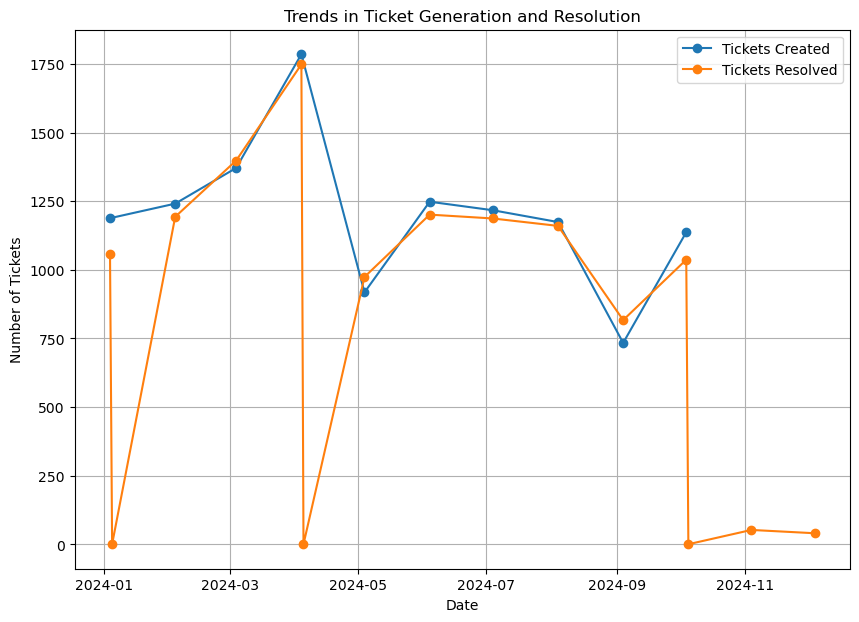

In [13]:
plt.figure(figsize=(10, 7))

plt.plot(tickets_created_per_day.index, tickets_created_per_day.values, label='Tickets Created', marker='o')
plt.plot(tickets_resolved_per_day.index, tickets_resolved_per_day.values, label='Tickets Resolved', marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Trends in Ticket Generation and Resolution')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Calculate average FRT and ART for each agent using .agg on groupby object
agent_performance = data_filtered.groupby('Assigned To').agg({'FRT in hours': 'mean', 'ART in hours': 'mean'})

# Display the agent performance
agent_performance.reset_index()


,Assigned To,FRT in hours,ART in hours
0,Agent 1,0.147208,1.334975
1,Agent 10,0.388350,1.312796
2,Agent 12,0.484848,1.844444
3,Agent 14,0.403704,1.370370
4,Agent 15,0.000000,7.000000
5,Agent 16,0.000000,2.000000
6,Agent 17,0.309804,1.680851
7,Agent 18,3.000000,NaN
8,Agent 2,0.785714,5.200000
9,Agent 20,0.117284,1.765550


In [15]:
# Count the number of tickets for each department
department_tickets = data_filtered['Department'].value_counts()
department_tickets

Department
Marketing Team      4411
Customer Support    2412
New Leads           2070
LOGISTICS           1781
Feedback             395
Payments Team        209
B2B                  178
Quality Team         154
Tech issue(New)       36
Others                17
Follow-up Leads        4
Name: count, dtype: int64

In [16]:
# Count the number of tickets for each issue category
issue_category_tickets = data_filtered['Issue Category'].value_counts()
issue_category_tickets

Issue Category
Call Tickets                      4166
Details verified                  1648
Indent Related                     579
Late Delivery                      573
Boys info                          514
                                  ... 
Tech Error                           1
Salted buffalo butter                1
Buffalo milk cup curds - 85gms       1
Referral Bonus Query                 1
Agent                                1
Name: count, Length: 71, dtype: int64

In [17]:
threshold=500
issue_category_tickets_aggregated = issue_category_tickets.copy()
small_categories = issue_category_tickets_aggregated[issue_category_tickets_aggregated < threshold].index
#print(small_categories)
issue_category_tickets_aggregated.loc['Other'] = issue_category_tickets_aggregated[small_categories].sum()
issue_category_tickets_aggregated = issue_category_tickets_aggregated.drop(small_categories)
issue_category_tickets_aggregated

Issue Category
Call Tickets        4166
Details verified    1648
Indent Related       579
Late Delivery        573
Boys info            514
Other               4167
Name: count, dtype: int64

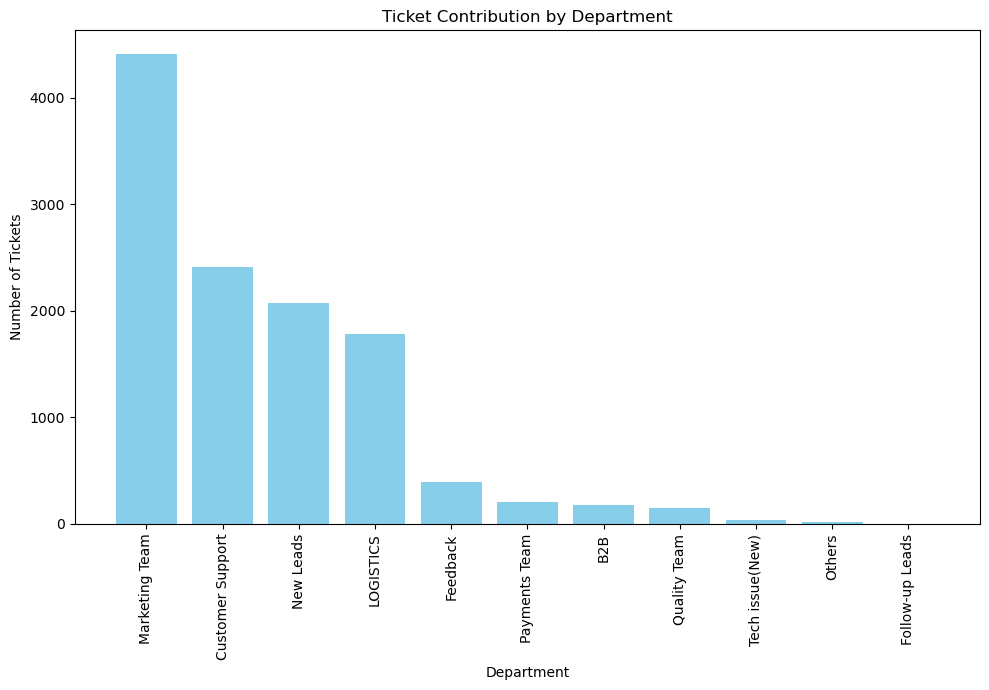

In [18]:
plt.figure(figsize=(10, 7))
plt.bar(department_tickets.index, department_tickets.values, color='skyblue')
plt.xlabel('Department')
plt.ylabel('Number of Tickets')
plt.title('Ticket Contribution by Department')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

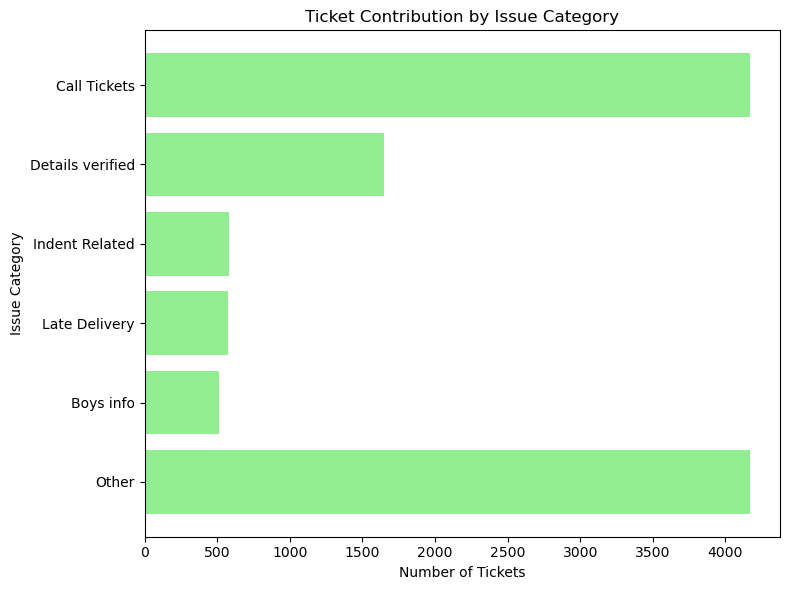

In [19]:
plt.figure(figsize=(8, 6))
plt.barh(issue_category_tickets_aggregated.index, issue_category_tickets_aggregated.values, color='lightgreen')
plt.ylabel('Issue Category')
plt.xlabel('Number of Tickets')
plt.title('Ticket Contribution by Issue Category')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.tight_layout()
plt.show()

In [20]:
department_trends = data_filtered.groupby(['Department', 'Created Date']).size().unstack(fill_value=0)
department_trends

Created Date,2024-01-04,2024-02-04,2024-03-04,2024-04-04,2024-05-04,2024-06-04,2024-07-04,2024-08-04,2024-09-04,2024-10-04
Department,,,,,,,,,,
B2B,10,25,17,14,24,15,17,20,18,18
Customer Support,225,306,304,352,205,209,207,217,209,178
Feedback,72,26,26,20,43,17,51,43,59,38
Follow-up Leads,2,0,0,0,0,0,1,1,0,0
LOGISTICS,127,165,156,559,133,114,143,155,124,105
Marketing Team,423,422,550,505,325,582,498,448,103,555
New Leads,226,233,216,246,134,236,255,211,188,125
Others,17,0,0,0,0,0,0,0,0,0
Payments Team,36,33,25,20,15,12,21,13,9,25


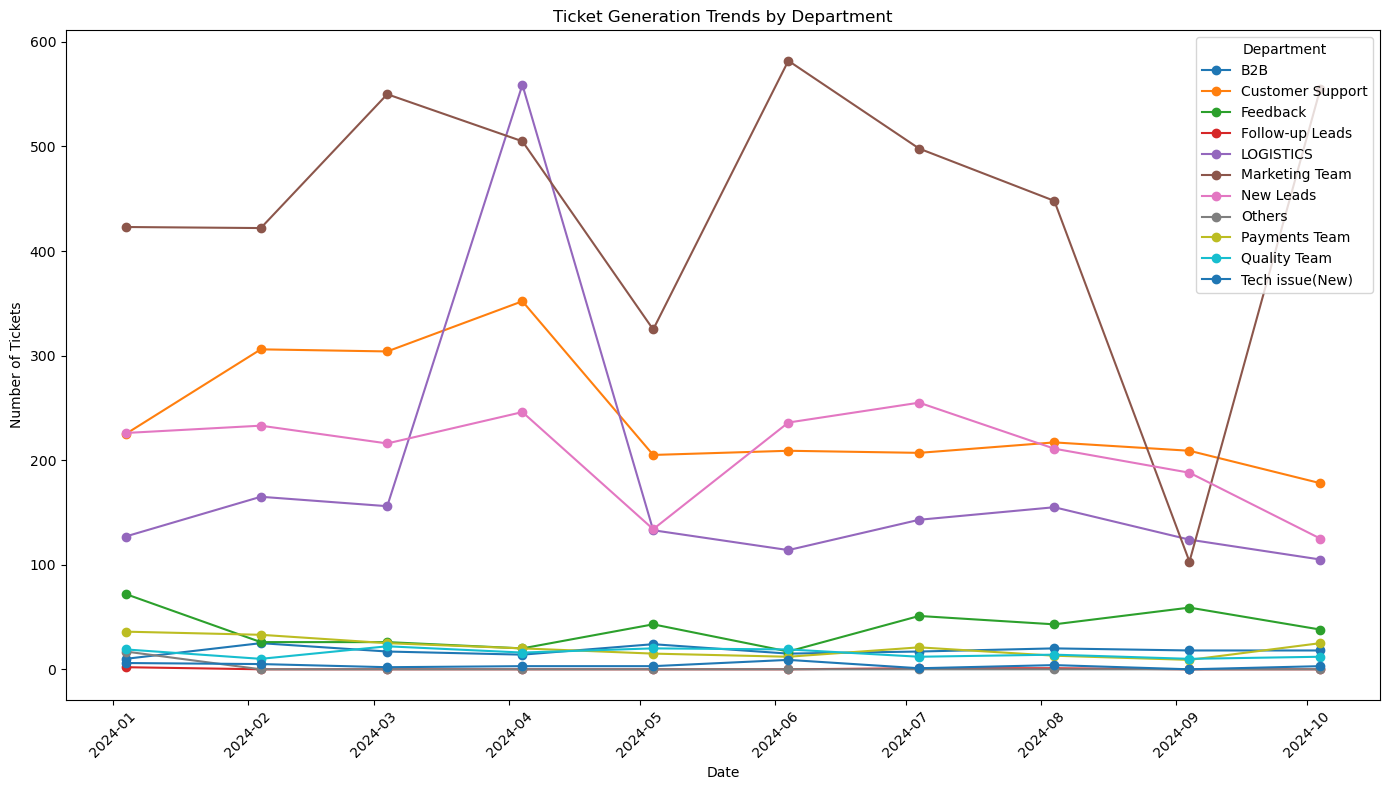

In [21]:
# Plot the trends
plt.figure(figsize=(14, 8))
for department in department_trends.index:
    plt.plot(department_trends.columns, department_trends.loc[department], marker='o', label=department)

plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Ticket Generation Trends by Department')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.tight_layout()
plt.show()

In [22]:
# Filter issue categories with at least 500 tickets
issue_category_counts = data_filtered['Issue Category'].value_counts()
large_issue_categories = issue_category_counts[issue_category_counts >= 500].index

# Filter the original data to include only these large issue categories
data_filtered_large = data_filtered[data_filtered['Issue Category'].isin(large_issue_categories)]

# Group by 'Issue Category' and 'Created Date' again
issue_category_trends_large = data_filtered_large.groupby(['Issue Category', 'Created Date']).size().unstack(fill_value=0)
issue_category_trends_large

Created Date,2024-01-04,2024-02-04,2024-03-04,2024-04-04,2024-05-04,2024-06-04,2024-07-04,2024-08-04,2024-09-04,2024-10-04
Issue Category,,,,,,,,,,
Boys info,55,68,48,61,47,42,52,57,46,38
Call Tickets,399,397,526,472,308,548,472,415,85,544
Details verified,173,183,168,183,108,202,207,170,150,104
Indent Related,54,83,51,57,60,47,42,75,49,61
Late Delivery,12,34,38,402,21,11,14,12,21,8


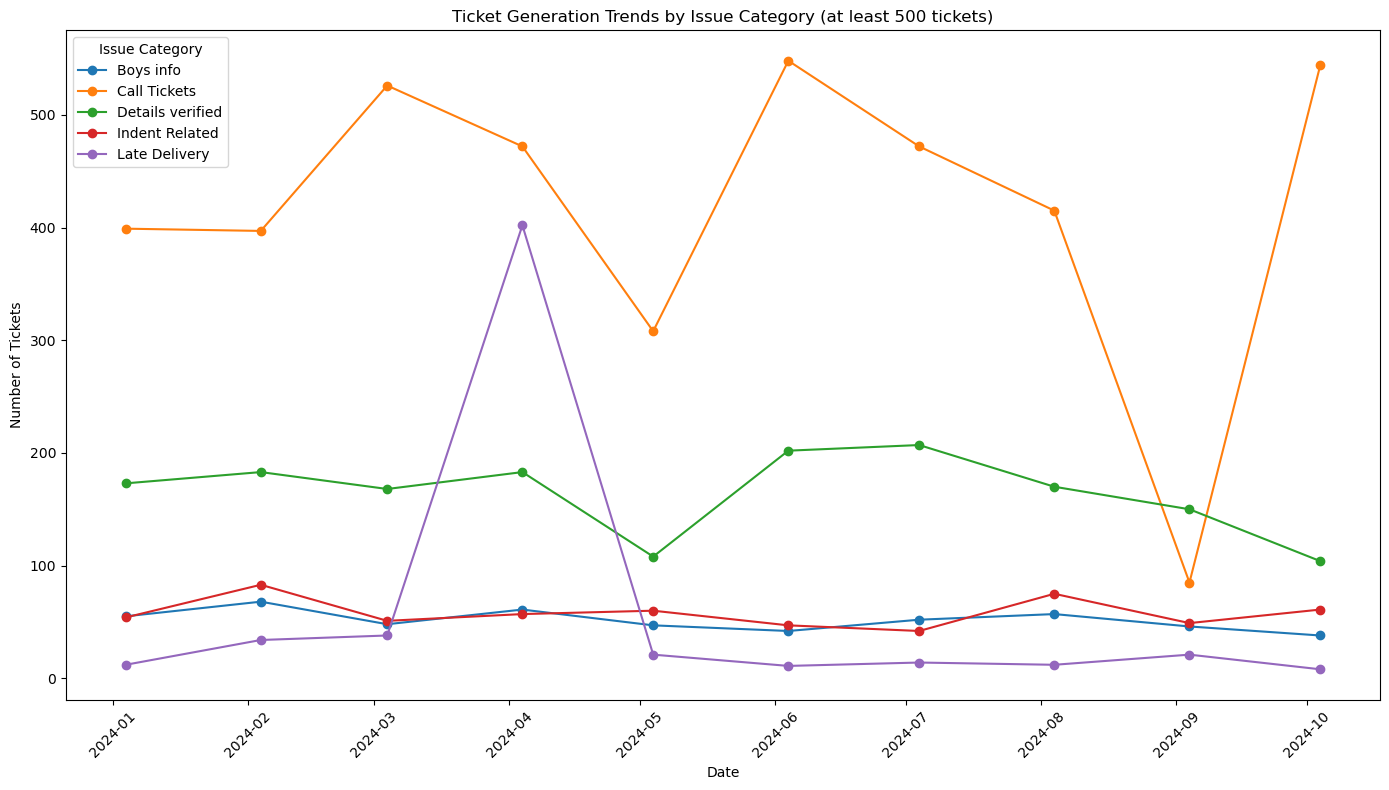

In [23]:
# Plot the trends
plt.figure(figsize=(14, 8))
for issue_category in issue_category_trends_large.index:
    plt.plot(issue_category_trends_large.columns, issue_category_trends_large.loc[issue_category], marker='o', label=issue_category)

plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Ticket Generation Trends by Issue Category (at least 500 tickets)')
plt.xticks(rotation=45)
plt.legend(title='Issue Category')
plt.tight_layout()
plt.show()

In [24]:
# Filter issue categories with at least 500 tickets
issue_category_counts = data_filtered['Issue Category'].value_counts()
large_issue_categories = issue_category_counts[issue_category_counts >= 500].index

# Filter the original data to include only these large issue categories
data_filtered_large_issue = data_filtered[data_filtered['Issue Category'].isin(large_issue_categories)]

# Group by 'Issue Category' and 'Created Date' for generation trends
issue_category_generation_trends = data_filtered_large_issue.groupby(['Issue Category', 'Created Date']).size().unstack(fill_value=0)

# Group by 'Issue Category' and 'Resolved Date' for resolution trends
issue_category_resolution_trends = data_filtered_large_issue.groupby(['Issue Category', 'Resolved Date']).size().unstack(fill_value=0)

In [25]:
# Filter departments with at least 100 tickets
department_counts = data_filtered['Department'].value_counts()
large_departments = department_counts[department_counts >= 500].index

# Filter the original data to include only these large departments
data_filtered_large_dept = data_filtered[data_filtered['Department'].isin(large_departments)]

# Group by 'Department' and 'Created Date' for generation trends
department_generation_trends = data_filtered_large_dept.groupby(['Department', 'Created Date']).size().unstack(fill_value=0)

# Group by 'Department' and 'Resolved Date' for resolution trends
department_resolution_trends = data_filtered_large_dept.groupby(['Department', 'Resolved Date']).size().unstack(fill_value=0)

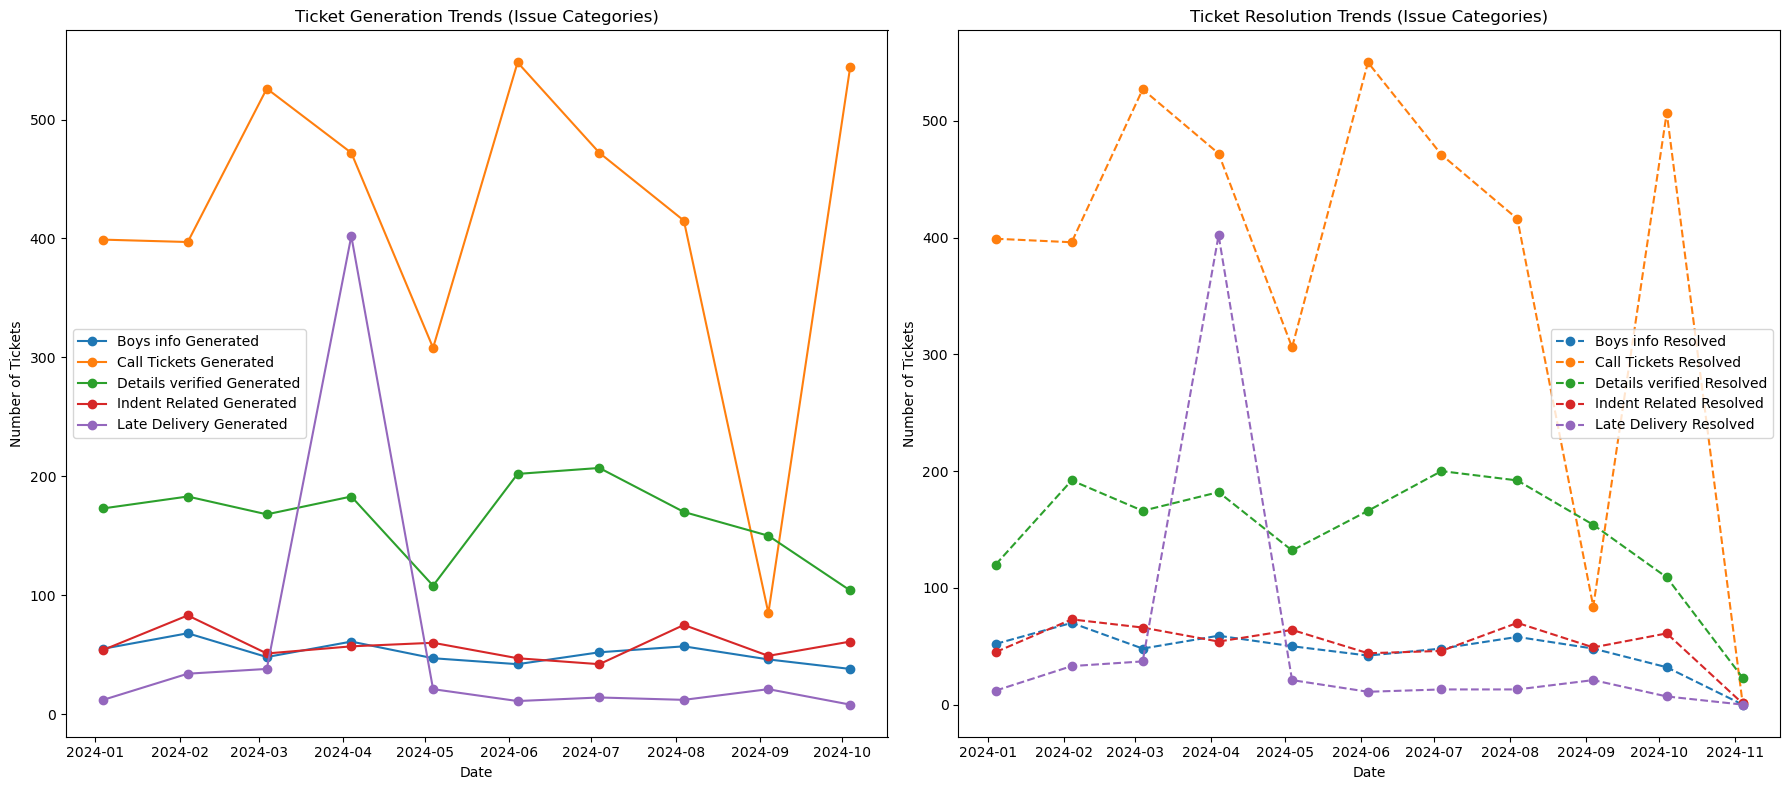

In [26]:
# Plotting side-by-side plots for large issue categories
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plotting issue category trends
for issue_category in issue_category_generation_trends.index:
    axs[0].plot(issue_category_generation_trends.columns, issue_category_generation_trends.loc[issue_category], marker='o', label=f'{issue_category} Generated')
    axs[1].plot(issue_category_resolution_trends.columns, issue_category_resolution_trends.loc[issue_category], marker='o', linestyle='--', label=f'{issue_category} Resolved')

axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Tickets')
axs[0].set_title('Ticket Generation Trends (Issue Categories)')
axs[0].legend()

axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Tickets')
axs[1].set_title('Ticket Resolution Trends (Issue Categories)')
axs[1].legend()

plt.tight_layout()
plt.show()

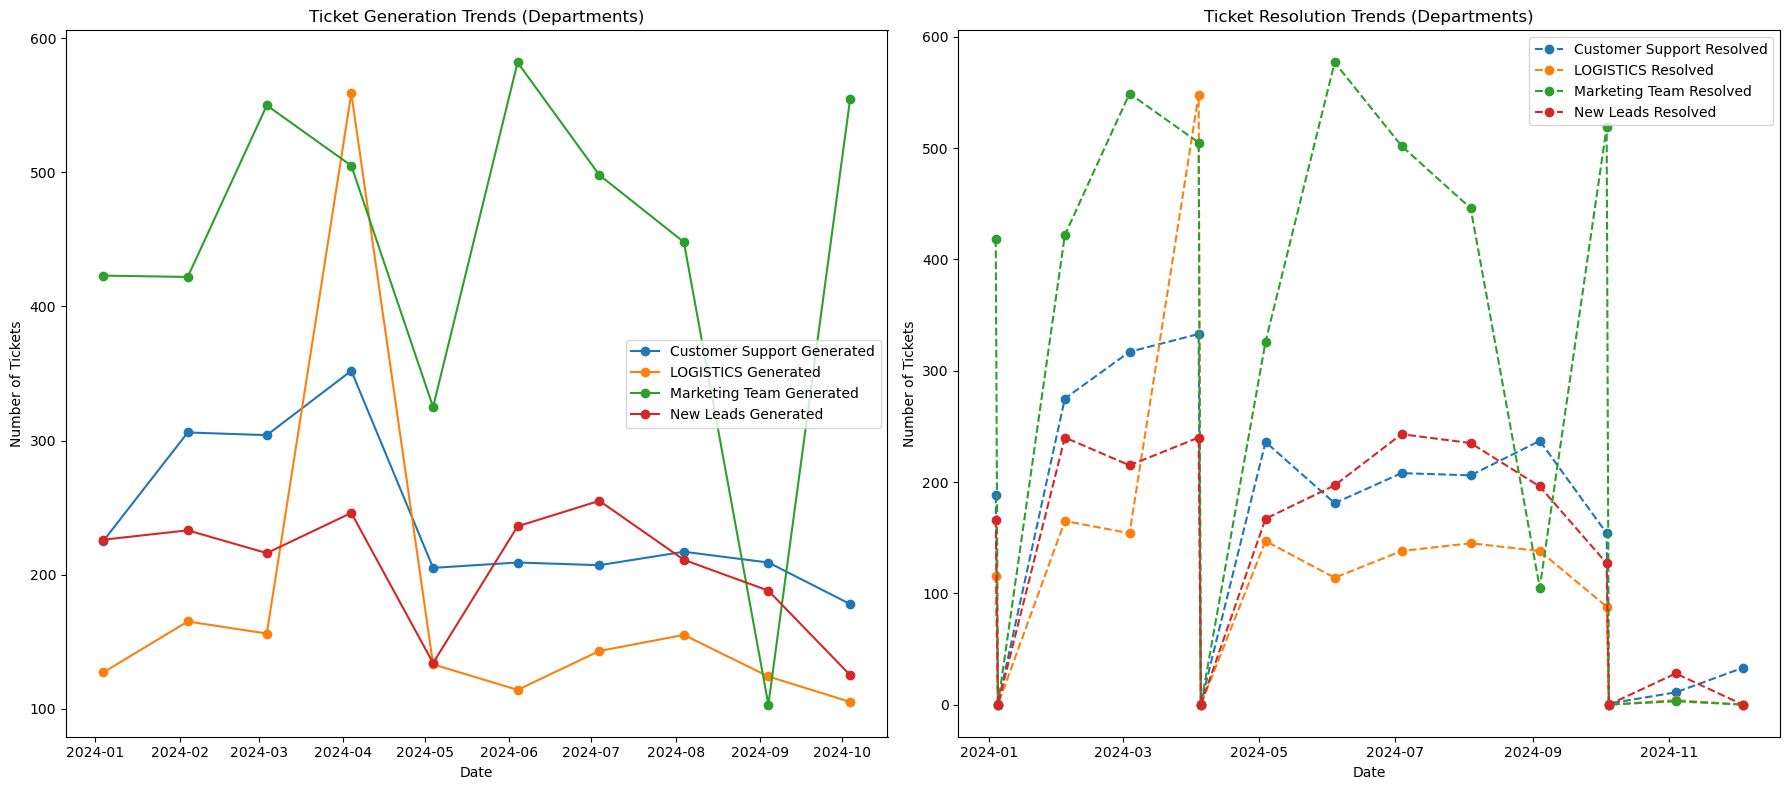

In [27]:
# Plotting side-by-side plots for large departments
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plotting department trends
for department in department_generation_trends.index:
    axs[0].plot(department_generation_trends.columns, department_generation_trends.loc[department], marker='o', label=f'{department} Generated')
    axs[1].plot(department_resolution_trends.columns, department_resolution_trends.loc[department], marker='o', linestyle='--', label=f'{department} Resolved')

axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Tickets')
axs[0].set_title('Ticket Generation Trends (Departments)')
axs[0].legend()

axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Tickets')
axs[1].set_title('Ticket Resolution Trends (Departments)')
axs[1].legend()

plt.tight_layout()
plt.show()


In [29]:
# Filtering departments and issue categories with more than 500 tickets onlly.
department_counts = data_filtered['Department'].value_counts()
departments_over_500 = department_counts[department_counts > 500].index.tolist()
data_filtered_dept_filtered = data_filtered[data_filtered['Department'].isin(departments_over_500)]

issue_category_counts = data_filtered['Issue Category'].value_counts()
issue_categories_over_500 = issue_category_counts[issue_category_counts > 500].index.tolist()
data_filtered_issue_filtered = data_filtered[data_filtered['Issue Category'].isin(issue_categories_over_500)]

In [30]:
# Calculating average FRT and ART for each department

data_filtered_dept_filtered['FRT in hours'] = (data_filtered_dept_filtered['First Response Time'] - data_filtered_dept_filtered['Created Time']).dt.total_seconds() / 3600
department_frt = data_filtered_dept_filtered.groupby('Department')['FRT in hours'].mean()
data_filtered_dept_filtered['ART in hours'] = (data_filtered_dept_filtered['Resolved Time'] - data_filtered_dept_filtered['Created Time']).dt.total_seconds() / 3600
department_art = data_filtered_dept_filtered.groupby('Department')['ART in hours'].mean()

In [31]:
# Calculating average FRT and ART for each issue category

data_filtered_issue_filtered['FRT in hours'] = (data_filtered_issue_filtered['First Response Time'] - data_filtered_issue_filtered['Created Time']).dt.total_seconds() / 3600
issue_category_frt = data_filtered_issue_filtered.groupby('Issue Category')['FRT in hours'].mean()
data_filtered_issue_filtered['ART in hours'] = (data_filtered_issue_filtered['Resolved Time'] - data_filtered_issue_filtered['Created Time']).dt.total_seconds() / 3600
issue_category_art = data_filtered_issue_filtered.groupby('Issue Category')['ART in hours'].mean()

In [32]:
# Ensuring data shapes are compatible for correlation calculations

department_frt = department_frt.to_frame().T.squeeze()
department_art = department_art.to_frame().T.squeeze()
issue_category_frt = issue_category_frt.to_frame().T.squeeze()
issue_category_art = issue_category_art.to_frame().T.squeeze()


In [33]:
# Calculating correlations between FRT and ART with departments and issue categories

department_frt_corr = department_frt.corr(department_art)
issue_category_frt_corr = issue_category_frt.corr(issue_category_art)
print("Correlation between FRT and ART for departments:", department_frt_corr)
print("Correlation between FRT and ART for issue categories:", issue_category_frt_corr)

Correlation between FRT and ART for departments: 0.9590791074917175
Correlation between FRT and ART for issue categories: 0.9906691800775775
